# NTRUencrypt
This notebook is for making graphs and tables to test things about NTRU. If any functions are not passing their tests, a red square will be printed. This is intended for learning only. It is not meant to be efficient code.

## Contents

### Number Theory Functions

### Polynomials

### Convolution Rings

### Ternary Polynomials

### When $p$ is not Prime

### NTRU Encrypt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from decimal import *

In [2]:
# this imports a whole bunch of functions from NTRU_implementation.ipynb
% run NTRU_implementation.ipynb

In [3]:
def make_square(fill_color):
    """ This plots a square for the purpose of getting my attention if
        one of my functions does not pass its tests. fill_color should
        be a string, like 'red' or 'green' """
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.fill_between([0,2], 0, 2, color=fill_color)
    plt.yticks([])
    plt.xticks([])
    plt.show()

#make_square('cyan')

# Number Theory Functions

These are used throughout the notebook.

## Contents

`multiplicative_order()`

`factor_p()`

`is_prime()`

`next_prime()`

`factor()`

`divisors()`

`euler_phi()`

`factorial()`

### Imported

`EEA()`

`modular_inverse()`

In [4]:
def multiplicative_order(a,n):
    """ Returns the multiplicative order of a mod n."""
    if EEA(a,n)[0] != 1:
        raise ValueError("{} and {} are not coprime".format(a,n))
    
    count = 1
    b = a % n    # reduce mod n. otherwise, it doesn't work
    while b != 1:
        b = (b*a) % n
        count += 1
    return count

# testing
validated = True
if multiplicative_order(2,7) != 3:
    validated = False
elif multiplicative_order(1,4) != 1:
    validated = False
if multiplicative_order(7,2) != 1:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [5]:
def factor_p(N, p):
    """ Factors N into powers of p. returns (alpha, m)
        such that N = p^alpha * m"""
    m = N
    alpha = 0
    while m % p == 0:
        m = m // p
        alpha += 1
    return (alpha, m)

# testing
validated = True
if factor_p(12, 2) != (2,3):
    validated = False
elif factor_p(60, 3) != (1, 20):
    validated = False
elif factor_p(15, 7) != (0, 15):
    validated = False


if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [6]:
def is_prime(p):
    """ For getting small primes only."""
    d = 2
    while d <= p//2:
        if p % d == 0:
            return False
        d += 1
    return True

def next_prime(p):
    """ Returns the next prime. Very inefficient."""
    q = p + 1
    while not is_prime(q):
        q += 1
    return q

# testing
validated = True
if is_prime(2) != True:
    validated = False
elif is_prime(3) != True:
    validated = False
elif is_prime(4) != False:
    validated = False

if next_prime(5) != 7:
    validated = False
if next_prime(20) != 23:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [7]:
def factor(N):
    """ Returns the factorization of N."""
    m = int(N)
    p = 2
    factors = []
    
    # iterate through each prime
    while p <= N//2:
        exp = 0
        
        # find all powers of the prime dividing N
        while m % p == 0:
            exp += 1
            m = m // p
        
        # if the prime divides N, add it to the list
        if exp > 0:
            factors.append((p,exp))
        p = next_prime(p)
    
    # if N is prime
    if len(factors) == 0:
        return [(N,1)]
    return factors

# testing
validated = True
if factor(12) != [(2,2), (3,1)]:
    validated = False
elif factor(29) != [(29,1)]:
    validated = False
elif factor(25) != [(5,2)]:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [8]:
def divisors(N):
    """ Returns a list of the divisors of N. Does not work for N=1."""
    divisors = [1]
    for i in range(2, N//2 + 1):
        if N % i == 0:
            divisors.append(i)
    divisors.append(N)
    return divisors

# testing
validated = True
if divisors(6) != [1,2,3,6]:
    validated = False
elif divisors(8) != [1,2,4,8]:
    validated = False
elif divisors(11) != [1,11]:
    validated = False
elif divisors(2) != [1,2]:
    validated = False
    
if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [9]:
def euler_phi(N):
    """ Returns phi(N), the count of numbers relatively prime
        to N between 1 and N-1"""
    if N == 1:
        return 1
    F = factor(N)
    phi = 1
    for (p, a) in F:
        phi *= (p**(a-1))*(p-1)
    return phi

# testing 
validated = True
if euler_phi(7) != 6:
    validated = False
elif euler_phi(6) != 2:
    validated = False
elif euler_phi(24) != 8:
    validated = False
elif euler_phi(1) != 1:
    validated = False
elif euler_phi(2) != 1:
    validated = False
    
if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [10]:
def factorial(n):
    prod = 1
    while n > 1:
        prod *= n
        n -= 1
    return prod

# testing
validated = True
if factorial(0) != 1:
    validated = False
elif factorial(4) != 24:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

### Polynomial Functions
### Imported

`to_string()`

`poly_format()`

`poly_add()`

`poly_subtract()`

`poly_mult()`

`poly_convolution()`

`poly_division()`

`poly_EEA()`

`reduce_mod()`

`scalar_mult()`

## Convolution Rings
This section is for learning about the units in $R_p$.

### Contents

`mult_table()`

`addition_table()`
 
 `units_in_F_p_mod_Phi_N()`
 
 `count_units()`
 
 `count_units_brute_force()`
 
 `get_units()`
 
 `get_nonunits()`
 
 `get_inverse()`
 
 `get_zero_divisors()`
  
 `unit_counts_table()`
 
 `units_3D()`
 
 `unit_proportion_intelligent()`
 
 `plot_unit_counts_fixed_p()`
 
 `plot_unit_counts_fixed_N()`
 
 `plot_unit_count_vs_mult_order()`
 
 `get_N_with_target_units()`
 
 ### Imported
 
 `has_inverse()`

In [11]:
import pandas as pd
from IPython.display import display, HTML
import itertools

def mult_table(N, p, latex=False):
    """ Displays the multiplication table for R_p as a pandas dataframe. If latex=True,
        we print the latex code for the table."""
    if p**N > 40:
        raise ValueError("You don't want to make a table that big.")
        
    # the elements of the ring, as tuples
    R_p = [i for i in itertools.product(range(p), repeat=N)]
    
    # a 2D-list of all products
    products = [[to_string(poly_format(poly_convolution(f, g, N, p=p)), latex=True) for f in R_p] for g in R_p]
    
    # a list of the polynomials as strings
    labels = [to_string(f, latex=True) for f in R_p]
    
    # make the dataframe
    df = pd.DataFrame(products, index=labels, columns=labels)
    if latex:
        print(df.to_latex(escape=False))
    return df

#x = mult_table(5,2, latex=True)
#y = x.style.set_properties(**{'background-color': 'black',
#                           'color': 'lawngreen',
#                           'border-color': 'white'})
#display(y)

In [12]:
def addition_table(N, p, latex=False):
    """ Displays the addition table for R_p as a pandas dataframe. If latex=True,
        we print the latex code for the table."""
    if p**N > 20:
        raise ValueError("You don't want to make a table that big.")
        
    # the elements of the ring, as tuples
    R_p = [i for i in itertools.product(range(p), repeat=N)]
    
    # a 2D-list of all sums
    sums = [[to_string(poly_format(poly_add(f, g, p=p)), latex=True) for f in R_p] for g in R_p]
    
    # a list of the polynomials as strings
    labels = [to_string(f, latex=True) for f in R_p]
    
    # make the dataframe
    df = pd.DataFrame(sums, index=labels, columns=labels)
    if latex:
        print(df.to_latex(escape=False))
    return df

#addition_table(3,2, latex=True)

In [13]:
def units_in_F_p_mod_Phi_N(N, p, q=1):
    """ This is a helper function for counting the units in R_p(N). It
        returns the number of units in F_p[x] / (Phi_N(x)^q). This
        only applies when p does not divide N. p is prime, of course.
        q = 1 by default."""
    
    if N == 1:
        return p**q - p**(q-1)
    r = multiplicative_order(p, N)
    e = euler_phi(N)
    return (p**(q*r) - p**((q-1)*r))**(e/r)

# testing
validated = True
if units_in_F_p_mod_Phi_N(1, 5) != 4:
    validated = False
elif units_in_F_p_mod_Phi_N(8, 3) != 64:
    validated = False
elif units_in_F_p_mod_Phi_N(7, 2) != 49:
    validated = False
elif units_in_F_p_mod_Phi_N(2, 7) != 6:
    validated = False
elif units_in_F_p_mod_Phi_N(3, 2, q=4) != 192:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [14]:
def count_units(N, p):
    """ Returns the number of units in R_p(N) using the Chinese Remainder Theorem"""
    
    # write N = p^alpha * m, with (p,m) = 1
    (alpha, m) = factor_p(N, p)
    q = p**alpha
    if m == 1:
        return (p**q - p**(q-1))
    r = multiplicative_order(p, m)
    D = divisors(m)
    num_units = 1
    for d in D:
        num_units *= units_in_F_p_mod_Phi_N(d, p, q=q)
    return num_units



# testing
validated = True
if count_units(3,2) != 3:
    validated = False
elif count_units(8, 2) != 128:
    validated = False
elif count_units(12, 2) != 1536:
    validated = False
elif count_units(5, 5) != 2500:
    validated = False
elif count_units(4, 7) != 1728:
    validated = False
    
if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [15]:
def count_units_brute_force(N, p):
    """ Returns a count of the units in R_p by iterating through all polynomials
        (Uses the Division Algorithm, so p must be prime)."""
    if not is_prime(p):
        raise ValueError("p must be prime to do the Division Algorithm in Z/pZ[x]")
    
    count = 0
    
    # if p == 2, only check polynomials with odd # of nonzero terms
    if p == 2:
        for f in itertools.product(range(p), repeat=N):
            if sum(f) % 2 == 1:
                if has_inverse(poly_format(f), N, p):
                    count += 1
        
    else:
        # iterate through every polynomial
        for f in itertools.product(range(p), repeat=N):
            if has_inverse(poly_format(f), N, p):
                count += 1
    return count

# testing
validated = True
if count_units_brute_force(3,2) != 3:
    validated = False
if count_units_brute_force(8, 2) != 128:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [16]:
def get_units(N, p):
    """ Returns a list of the units in R_p"""
    units = []
    
    # iterate through every polynomial
    for f in itertools.product(range(p), repeat=N):
        f = poly_format(f)
        if has_inverse(f, N, p):
            units.append(f)
    return units

def get_nonunits(N, p):
    """ Returns a list of the nonunits in R_p"""
    nonunits = []
    
    # iterate through every polynomial
    for f in itertools.product(range(p), repeat=N):
        f = poly_format(f)
        if not has_inverse(f, N, p):
            nonunits.append(f)
    return nonunits

# testing
validated = True
if set(tuple(unit) for unit in get_units(3,2)) != {(1,), (0,1), (0,0,1)}:
    validated = False
if set(tuple(nonunit) for nonunit in get_nonunits(3,2)) != {(0,), (1,0,1), (0,1,1), (1,1), (1,1,1)}:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')
    
print(get_units(3,2))
print(get_units(6,2))

[[0, 0, 1], [0, 1], [1]]
[[0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1], [0, 0, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1], [0, 1], [0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1], [1], [1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1]]


In [17]:
def get_inverse(f, N, p):
    """ Brute force finds the inverse of f in R_p"""
    for g in itertools.product(range(p), repeat=N):
        g = poly_format(g)
        if poly_convolution(f,g,N,p=p) == [1]:
            return g
    return None

def get_zero_divisors(f, N, p):
    """ Brute force finds all g such that f*g = 0"""
    zero_divisors = []
    for g in itertools.product(range(p), repeat=N):
        g = poly_format(g)
        if g != [0] and poly_convolution(f,g,N,p=p) == [0]:
            zero_divisors.append(g)
    return zero_divisors

# testing
validated = True
if get_inverse([0,1], 3, 2) != [0,0,1]:
    validated = False
elif set([tuple(z) for z in get_zero_divisors([1,1,1], 3, 2)]) != set([(1,1), (1,0,1), (0,1,1)]):
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

print(get_inverse([0,0,1],3,2))
print(get_inverse([0,0,1,0,0,0],6,2))

[0, 1]
[0, 0, 0, 0, 1]


In [18]:
def unit_counts_table(min_N, max_N, min_p, max_p, display_type='counts', latex=False):
    """ Makes a table showing how many units are in R_p. If display_type
        = 'counts', then the raw counts are displayed. If display_type = 
        'percents', then the percents are displayed."""
    N_values = range(min_N, max_N + 1)
    p_values = [p for p in range(min_p, max_p + 1) if is_prime(p)]
        
    if display_type == 'counts':
        values = [[count_units(N,p) for p in p_values] for N in N_values]
    elif display_type == 'percents':
        values = [["{0:.2f}".format(round(count_units(N,p)*100/(p**N),2)) for p in p_values] for N in N_values]
        
    df = pd.DataFrame(values, index=N_values, columns=p_values)
    
    if latex:
        print(df.to_latex(escape=False))
    return df

#unit_counts_table(2,6,2,7, display_type='percents', latex=True)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def units_3D(max_N, max_p, contour=False, filename=None):
    """ Makes a 3D plot of the number of units in R_p(N)
        up to the arguments."""
    x = [p for p in range(2, max_p+1) if is_prime(p)]; y = range(2,max_N+1)
    z = [[count_units(N, p)/(p**N)*100 for p in x] for N in y]
    x, y = np.meshgrid(x,y)
    
    # make a 3D plot
    if not contour:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d') # this gets us ready to do 3d
        ax.plot_surface(x,y,z, cmap=cm.coolwarm)
        ax.set_zticks([])
        plt.xlabel(r'$p$', size=14)
        plt.ylabel(r'$N$', size=14)
        plt.title(r"Percent of Units in $R_p(N)$", size=15)
        if filename:
            plt.savefig(filename)
        plt.show()
        plt.clf()
        
    # make a contour plot
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)        # need to remove the 'projection=3d' here
        cs = plt.contourf(x,y,z, 20, cmap=cm.jet)
        plt.xlabel(r'$p$', size=14)
        plt.ylabel(r'$N$', size=14)
        plt.title(r"Percent of Elements that are Units in $R_p(N)$", size=15)
        plt.colorbar(cs)
        if filename:
            plt.savefig(filename)
        plt.show()
    plt.clf()
    return None

#units_3D(70,23, contour=True)#, filename="unit_contour70x23.png")

In [20]:
def unit_proportion_intelligent(N, p, more_intelligent=False):
    """ For N prime and p prime, returns the proportion of units in R_p(N). Does this by multiplying
        and dividing strategically to avoid overflows. If you set more_intelligent to be True,
        then we leave off the (1-1/p) (ignore polynomials for f(1) = 0)."""
    if not is_prime(N) or not is_prime(p):
        raise ValueError("N and p must be prime for unit proportions intelligent")
    r = multiplicative_order(p, N)
    
    if not more_intelligent:
        unit_proportion = (1 - 1/p)   # we will multiply things by this
    else:
        unit_proportion = 1
    
    product_term = 1    # this will be 1 - p^r
    for _ in range(r):
        product_term = product_term / p
        
    product_term = 1 - product_term
    
    for _ in range((N-1) // r):
        unit_proportion *= product_term
        
    return unit_proportion

# testing
validated = True
if unit_proportion_intelligent(5,3) != count_units(5,3) / (3**5):
    validated = False
if np.abs(unit_proportion_intelligent(7,3)- count_units(7,3) / (3**7)) > 0.00000001:
    validated = False
if np.abs(unit_proportion_intelligent(3,5)- count_units(3,5) / (5**3)) > 0.00000001:
    validated = False

if not validated:
    make_square('red')

print(np.log(1-unit_proportion_intelligent(127,2, more_intelligent=True)) / np.log(10))

-0.8805310879933116


In [21]:
from decimal import *
def NTRU_technical_report_009(N, p, approximate=False, precision=1000):
    """ I'm writing this to check what is written in NTRU technical report 009.
        Returns the log base 10 of the proportion of non-units in R_q(N)(1).
        Assuming N prime, p prime. And since we only care about the log of
        something which is a product, we're only finding a sum of logs.
        You can adjust the precision if you're using N and p big."""
    
    n = multiplicative_order(p, N)
    getcontext().prec = precision
    # calculate (1 - 1/p^n)^((N-1)/n)
    if not approximate:
        prop = 1
        for _ in range(n):
            prop = Decimal(prop) / p # need Decimal here for precision issues
        prop = Decimal(1 - prop)
        mult_by = Decimal(prop)
        for _ in range((N-1)//n):
            prop *= mult_by
        return float((1-prop).log10())
            
        
        
    # calculate 1 - (N-1)/(np^n)
    else:
        
        
        prop = Decimal((N-1)) / Decimal(n)
        for _ in range(n):
            prop = prop / Decimal(p)
        return float(prop.log10())

N=1019
print(NTRU_technical_report_009(N, 2, approximate=False))
print(NTRU_technical_report_009(N, 2, approximate=True, precision=1000))
print(NTRU_technical_report_009(N, 3, approximate=False))
print(NTRU_technical_report_009(N, 3, approximate=True, precision=1000))

-306.14750559026885
-306.44853558593286
-242.37759739758852
-242.5536886566442


In [22]:
def test_approximation(min_N, max_N, filename=None):
    """ Makes a scatterplot of the percent error between the approximation
        and the actual probability of getting a non-unit in R_p(N) for every
        prime N up to max_N for p = 2 and 3.  And it's not probabilities, it's the log_10 of them."""
    x_values = [N for N in range(min_N, max_N) if is_prime(N)]
    
    # for p = 2
    true_values_2 = [NTRU_technical_report_009(N, 2, precision=1000) for N in x_values]
    approx_values_2 = [NTRU_technical_report_009(N, 2, approximate=True) for N in x_values]
    error_values_2 = [(true_values_2[i] - approx_values_2[i])/true_values_2[i]*100 for i in range(len(x_values))]
    plt.plot(x_values, error_values_2, 'co', label=r'$p=2$', alpha=.95)
    
    # for p = 3
    true_values_3 = [NTRU_technical_report_009(N, 3, precision=1200) for N in x_values]
    approx_values_3 = [NTRU_technical_report_009(N, 3, approximate=True) for N in x_values]
    error_values_3 = [(true_values_3[i] - approx_values_3[i])/true_values_3[i]*100 for i in range(len(x_values))]
    plt.plot(x_values, error_values_3, 'mo', label=r'$p=3$', alpha=.8)
    
    # legend and labels
    plt.legend(fontsize=15)
    plt.xlabel(r"$N$", size=16)
    plt.ylabel("Percent Error", size=16)
    plt.title("Percent Error Between Approximations of " + r"Prob${}_p(N)$ and the Actual Value", size=15)
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
#test_approximation(5, 130)#, filename="Technical_Report_009_Approximation.jpg")

In [23]:
def plot_NTRU_technical_report_009(min_N, max_N, p, filename=None):
    """ This is a modification of something I did earlier. Instead of looking at the
        proportion of units in R_p(N), we look at R_p(N)(1). I still have the thing with
        colors representing how much of R_p(N) is generated by p."""
    x_values = [N for N in range(min_N, max_N+1) if is_prime(N)]
    y = [NTRU_technical_report_009(N, p, approximate=True) for N in x_values]
    z = [multiplicative_order(p,N)/(N-1) for N in x_values]
    
    cmap = cm.get_cmap('cool')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(mult_order)) for mult_order in z]
    
    fig, ax = plt.subplots(figsize=(9,9))
    ax.scatter(x_values, y, color=colors, s=60)
        
    plt.xlabel(r"$N$", size=16)
    plt.ylabel(r"Prob${}_{}(N)$".format("",p), size=18)
    
    cax, _ = matplotlib.colorbar.make_axes(ax)
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    
    # putting this after the color bar definition puts it on the right
    plt.ylabel(r"Proportion of $\mathbb{Z}/N\mathbb{Z}$" + " generated by {}".format(p), size=18)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    
    plt.show()
    return

#plot_NTRU_technical_report_009(5, 1200, 3, filename='plot_NTRU_technical_report_009_3.jpg')

In [24]:
def find_N_with_both_generators(max_N, primes):
    """ Returns a list of all prime N up to max_N such that all
        p in primes are generators."""
    targets = []
    for N in range(max(primes) + 1, max_N + 1):
        if is_prime(N):
            they_are_generators = True
            for p in primes:
                if multiplicative_order(p, N) != N-1:
                    they_are_generators = False
            if they_are_generators:
                targets.append(N)
    return targets

#print(len(find_N_with_both_generators(100000, [2,3])))

In [25]:
def compare_N_prob(filename=None):
    """ Makes a plot of how the probability of getting a non-unit varies for
        different types of N: parameter N's, 2 and 3 both generator N's, and
        Sophie Germain N's. Assuming we are doing both 2 and 3. But it will be
        dominated by the bigger probability (the less negative log base 10), so
        we just use that."""
    generator_Ns = find_N_with_both_generators(1100, [2,3])
    parameter_Ns = [83, 107, 167, 263, 503, 401, 439, 593, 743, 443, 587]
    sophie_germain_Ns = [47, 59, 107, 167, 503, 1019]
    generator_ys = [max([NTRU_technical_report_009(N, 2), NTRU_technical_report_009(N,3)]) for N in generator_Ns]
    parameter_ys = [max([NTRU_technical_report_009(N, 2), NTRU_technical_report_009(N,3)]) for N in parameter_Ns]
    sophie_germain_ys = [max([NTRU_technical_report_009(N, 2), NTRU_technical_report_009(N,3)]) for N in sophie_germain_Ns]
    
    plt.plot(generator_Ns, generator_ys, 'co', ms=12, alpha=.6, label="2 and 3 generate")
    plt.plot(parameter_Ns, parameter_ys, 'o', color='orange', ms=12, alpha=.6, label="Parameter set N's")
    plt.plot(sophie_germain_Ns, sophie_germain_ys, 'mo', ms=12, alpha=.6, label="Sophie Germain N's")
    plt.legend(fontsize=13, frameon=True, edgecolor='black')
    plt.xlabel(r"$N$", size=16)
    plt.ylabel(r"Log of Prob. of a Non-unit in $R_2(N)$ or $R_3(N)$", size=16)
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
#compare_N_prob(filename="compare_N_prob.jpg")

In [26]:


def plot_unit_counts_fixed_p(p, min_N, max_N, filename=None, cool_plot=True, more_intelligent=False):
    """ Makes a plot of the percent of units in R_p as a function 
        of N. If a filename is specified, the figure is saved.
        I have added a new option called cool_plot. In cool plot,
        each point is colored based on the order of p mod N, and we
        only do N prime"""
    if not cool_plot:
        N_values = range(min_N, max_N + 1)
        y = [count_units(N,p)*100/(p**N) for N in N_values]
        plt.plot(N_values, y, 'bo', alpha=.8)
        plt.xlabel("N", size=15)
        plt.ylabel("Percent", size=15)
    
        # I think you need to hard code in the p
        plt.title("Pecent of Elements of " + r'$R_{}$'.format(p) + " That are Units", size=16)
        if filename:
            plt.savefig(filename)
        plt.show()
        return
    
    # the cool plot
    # code from https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html
    N_values = [N for N in range(min_N, max_N+1) if is_prime(N) and N != p]
    y = [unit_proportion_intelligent(N, p, more_intelligent=more_intelligent) for N in N_values]
    z = [multiplicative_order(p,N)/(N-1) for N in N_values]
    
    cmap = cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(mult_order)) for mult_order in z]
    
    fig, ax = plt.subplots(figsize=(9,9))
    ax.scatter(N_values, y, color=colors, s=60)
    
    plt.xlabel(r"$N$ (prime)", size=20)
    plt.ylabel(r"Proportion of Units in $R_{}(N)$".format(p), size=20)
    cax, _ = matplotlib.colorbar.make_axes(ax)
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    plt.ylabel(r"Proportion of $\mathbb{Z}/N\mathbb{Z}$ generated by " + "{}".format(p), size=20)
    if filename:
            plt.savefig(filename)
    plt.show()
    
#plot_unit_counts_fixed_p(3,50,5000, cool_plot=True, more_intelligent=True)#, filename="unit_counts_3x1000.jpg")
#print(unit_proportion_intelligent(743,3))

In [27]:
def plot_unit_counts_fixed_N(N, min_p, max_p, filename=None):
    """ Makes a plot of the percent of units in R_p as a function 
        of p. If a filename is specified, the figure is saved."""
    p_values = [p for p in range(min_p, max_p + 1) if is_prime(p)]
    y = [count_units(N,p)*100/(p**N) for p in p_values]
    plt.plot(p_values, y, linewidth=3)
    plt.xlabel(r"$p$", size=15)
    plt.ylabel("Percent", size=15)
    #plt.xticks(p_values)
    
    # need to hard code in N
    plt.title("Pecent of Elements of " + r'$R_p$' + " That are Units for " + r'N=5', size=16)
    if filename:
        plt.savefig(filename)
    plt.show()
    return

#plot_unit_counts_fixed_N(5, 2, 11, filename="fixed_N_5.png")

In [28]:
def plot_unit_count_vs_mult_order(max_N, p, filename=None):
    """ Makes a scatterplot of the percent of R_p(N) that is units versus
        |p| mod N /(N-1) for N prime. (p is prime, of course)"""
    N_values = [N for N in range(2,max_N+1) if is_prime(N) and N != p]
    x = [multiplicative_order(p, N)/(N-1) for N in N_values]
    y = [count_units(N, p)/(p**N) for N in N_values]
    plt.plot(x,y, 'o')
    plt.title(r"The Proportion of Units in $R_2(N)$ vs the Relative Order of 2 mod $N$", size=14)
    plt.xlabel(r"$\frac{|\langle 2\rangle|}{(N-1)}$", size=20)
    plt.ylabel(r"$\frac{|U(R_2(N))|}{p^N}$", size=20)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    return

#plot_unit_count_vs_mult_order(1000,2, filename="order_of_2_mod_N.jpg")

In [29]:
def get_N_with_target_units(p, target, tolerance, max_N=1000):
    """ Given p, returns all N such that the proportion of
        units in R_p(N) is within tolerance of target"""
    answers = []
    for N in range(2, max_N+1):
        if np.abs(count_units(N,p)/(p**N) - target) < tolerance:
            answers.append(N)
    return answers

print(get_N_with_target_units(3, .2, .05, max_N=646))

[80, 104, 160, 208, 240, 312, 320, 400, 416, 480, 520, 560, 624, 640]


# Ternary Polynomials

This is for studying $T(d_1, d_2)$.

## Contents

`num_trinomials()`

`plot_num_trinomials()`

`num_trinomials_2()`

`max_trinomials()`

`permute_next()`

`count_units_in_T()`

`unit_counts_table_T()`

In [30]:
def num_trinomials(N, d_1, d_2, p=3):
    """ The number of ternary polynomials. Specify p=2 if you want that."""
    if p != 2:
        return factorial(N) / (factorial(d_1)*factorial(d_2)*factorial(N-d_1-d_2))
    else:
        return factorial(N) / (factorial(d_1 + d_2) * factorial(N - d_1 - d_2))

# testing
validated = True
if num_trinomials(7, 3, 2) != 210:
    validated = False

if not validated:
    make_square('red')
#else:
#    make_square('cyan')

In [31]:

def plot_num_trinomials(N, contour=False, filename=None):
    """ Makes a 3D plot of how the size of T(d1, d2) varies as a
        function of d1 and d2, or a contour plot. Saves the image
        if a filename is given."""
    
    
    
    # make the x,y,z coordinates, each as 2D np arrays
    x = range(N); y = range(N)
    x, y = np.meshgrid(x,y)
    z = [[num_trinomials(N, d1, d2) for d1 in range(N)] for d2 in range(N)]
    
    # make a 3D plot
    if not contour:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d') # this gets us ready to do 3d
        ax.plot_surface(x,y,z, cmap=cm.coolwarm)
        ax.set_zticks([])
        plt.xlabel(r'$d_1$', size=14)
        plt.ylabel(r'$d_2$', size=14)
        plt.title(r"Size of $T(d_1,d_2)$ for $N=$" + str(N), size=15)
        if filename:
            plt.savefig(filename)
        plt.show()
        plt.clf()
        
    # make a contour plot
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)        # need to remove the 'projection=3d' here
        cs = plt.contourf(x,y,z, 50, cmap=cm.coolwarm)
        plt.xlabel(r'$d_1$', size=14)
        plt.ylabel(r'$d_2$', size=14)
        plt.title(r"Size of $T(d_1,d_2)$ for $N=$" + str(N), size=15)
        plt.colorbar(cs)
        if filename:
            plt.savefig(filename)
        plt.show()
    plt.clf()
    return None

#plot_num_trinomials(111, contour=False)# filename="contour443_50.png")

In [32]:
def num_trinomials_2(max_N, filename=None, lines=False):
    """ Compares the max number of trinomials as N increases
        for p = 2 vs p neq 2. Lines = True adds in the lines
        y = 2^x and y = 3^x, to confirm Stirling's formula."""
    x = range(2, max_N + 1)
    y_1 = [np.log(factorial(N)/(factorial(N//3)**3)) for N in x]
    y_2 = [np.log(factorial(N)/(factorial(N//2)**2)) for N in x]
    if lines:
        line_1 = [np.log(2)*(N-1) for N in x]
        line_2 = [np.log(3)*(N-1) for N in x]
        plt.plot(x, line_1, alpha=.5, color='magenta', lw=14, label="$y=2^{N-1}$")
        plt.plot(x, line_2, alpha=.5, color='cyan', lw=14, label="$y=3^{N-1}$")
    
    plt.plot(x, y_2, label=r"$p=2$", lw=3, color='red')
    plt.plot(x, y_1, label=r"$p\neq 2$", lw=3)
    plt.legend(fontsize=15)
    plt.ylabel("Log(Number of Trinomials)", size=15)
    plt.xlabel("N", size=15)
    plt.title(r"Is $T(d_1,d_2)$ Smaller When $p=2$?", size=16)
    if filename:
        plt.savefig(filename)
    plt.show()
    
#num_trinomials_2(100, lines=True, filename="num_trinomials_2_lines.jpg")

In [33]:
def plot_num_trinomials_2_vs_q(max_N, filename=None):
    """ Makes a plot of T(d+1, d) vs N for p = 2 and
        q > 2. """
    x = range(2, max_N + 1)  # the N's are the x-values
    d_values_2 = [N//4 for N in x]
    d_values_not = [N//3 for N in x]
    
    # when d = N//4, optimized for p=2
    y_2_2 = [np.log(num_trinomials(x[i], d_values_2[i]+1, d_values_2[i], p=2)) for i in range(len(x))]
    y_q_2 = [np.log(num_trinomials(x[i], d_values_2[i]+1, d_values_2[i])) for i in range(len(x))]
    plt.plot(x, y_2_2, label=r'$p=2, d=N//4$')
    plt.plot(x, y_q_2, label=r'$p\neq2, d=N//4$')
    
    # when d = N//4, optimized for p=2
    y_2_not = [np.log(num_trinomials(x[i], d_values_not[i]+1, d_values_2[i], p=2)) for i in range(len(x))]
    y_q_not = [np.log(num_trinomials(x[i], d_values_not[i]+1, d_values_2[i])) for i in range(len(x))]
    
    plt.plot(x, y_2_not, label=r'$p=2, d=N//3$')
    plt.plot(x, y_q_not, label=r'$p\neq2, d=N//3$')
    plt.legend(fontsize=14)
    plt.xlabel(r"$N$", size=15)
    plt.ylabel(r"Log of Size of $T(d+1, d)$", size=15)
        
    if filename:
        plt.savefig(filename)
    plt.show()
    return

#plot_num_trinomials_2_vs_q(400)#, filename="good_d_vs_bad_d.jpg")

In [34]:
def max_trinomials(N, p):
    """ Returns the max number of ternary polynomials
        in R_p(N)"""
    if p == 2:
        return factorial(N) / (factorial(N//4+ N//4 + 1)*factorial(N - N//4 - N//4 - 1))
    else:
        return factorial(N) / (factorial(N//3 + 1) * factorial(N//3) * factorial(N - N//3 - N//3 - 1))

In [35]:
# Note: This function was copied and pasted from
# http://code.activestate.com/recipes/496869-computing-permutations-with-duplicates/
# Created by Christopher Dunn on July 6th, 2006.

def permute_next(values):
    """
    Alter the list of values in-place to produce to the next permutation
    in lexicographical order.

    'values' must support slicing and ::reverse().
    """
    last = len(values) - 1
    a = last
    while a > 0:
        b = a
        a -= 1
        if values[a] < values[b]:
            c = last
            while values[a] >= values[c]: # >= allows duplicates
                c -= 1
            values[a], values[c] = values[c], values[a] # Swap.
            values[b:] = values[:b-1:-1] # Reverse.
            return values
    values.reverse()
    return values

# testing
validated = True
if permute_next([1,2,3]) != [1,3,2]:
    validated = False
elif permute_next([1,-1,0,1]) != [1,-1,1,0]:
    validated = False
    

if not validated:
    make_square('red')
#else:
    #make_square('cyan')

In [36]:
def count_units_in_T(N, p):
    """ Returns the number of units in T(d+1, d),
        by brute force :("""
    count = 0
    
    # choose the starting polynomial differently based on whether p = 2 or not.
    if p == 2:
        d = N//4
        seed = [1 for i in range(d + d + 1)] + [0 for i in range(N - d - d - 1)]
    else:
        d = N//3
        seed = [1 for i in range(d + 1)] + [-1 for i in range(d)] + [0 for i in range(N - d - d - 1)]
    f = permute_next(list(seed))
    while f != seed:
        if has_inverse(f, N, p):
            count += 1
        f = permute_next(f)
    if has_inverse(seed, N, p):
        count += 1
    return count
    
# testing
validated = True
if count_units_in_T(5,2) != 10:
    validated = False
    
if validated == False:
    make_square('red')

In [37]:
def unit_counts_table_T(min_N, max_N, min_p, max_p, display_type='counts', latex=False):
    """ Makes a table showing how many units are in R_p. If display_type
        = 'counts', then the raw counts are displayed. If display_type = 
        'percents', then the percents are displayed."""
    N_values = range(min_N, max_N + 1)
    p_values = [p for p in range(min_p, max_p + 1) if is_prime(p)]
        
    if display_type == 'counts':
        values = [[count_units_in_T(N,p) for p in p_values] for N in N_values]
    elif display_type == 'percents':
        values = [["{0:.2f}".format(round(count_units_in_T(N,p)*100/(max_trinomials(N,p)),2)) for p in p_values] for N in N_values]
        
    df = pd.DataFrame(values, index=N_values, columns=p_values)
    
    if latex:
        print(df.to_latex(escape=False))
    return df

#unit_counts_table_T(2,9,2,17, display_type='percents', latex=True)

# When $p$ is not prime

### Contents

`count_units_brute_force_full()`

`count_units_full()`

`unit_percentages_full()`

`unit_counts_table_full()`

`units_contour_full()`

`count_units_in_T_full()`

`contour_T()`

### Imported

`lift_inverse()`

`find_inverse_mod_q()`

In [38]:
def count_units_brute_force_full(N, p):
    """ True brute force: counts units by manually checking if
        each element has an inverse. Should work for all N and p."""
    count = 0
    for f in itertools.product(range(p), repeat=N):
        if get_inverse(f,N,p) != None:
            count += 1
        else:
            count += 0
    return count

# testing
validated = True
if count_units_brute_force_full(4, 3) != count_units_brute_force(4,3):
    validated = False
if count_units_brute_force_full(5, 2) != count_units_brute_force(5,2):
    validated = False
if count_units_brute_force_full(6, 2) != count_units_brute_force(6,2):
    validated = False

if not validated:
    make_square('red')

In [39]:
def count_units_full(N, p):
    """ Counts the units in R_p(N) for any value of p or N."""
    factors = factor(p)
    
    # this will be the product
    U = 1
    
    for(p_i, e_i) in factors:
        U *= count_units(N, p_i)*(p_i ** (N*(e_i-1)))
        
    return U


# testing
validated = True
if count_units_full(3,4) != count_units_brute_force_full(3,4):
    validated = False
if count_units_full(2,6) != count_units_brute_force_full(2,6):
    validated = False
if count_units_full(2,10) != count_units_brute_force_full(2,10):
    validated = False
if count_units_full(4,4) != count_units_brute_force_full(4,4):
    validated = False
    
if not validated:
    make_square('red')

In [40]:
def unit_percentages_full(N, p):
    """ Returns the percent of units in R_p(N) for any p and N."""
    factors = factor(p)
    percent = 1
    for (p_i, e_i) in factors:
        percent *= count_units(N,p_i)/(p_i**N)
    return percent*100

# testing
validated = True
if unit_percentages_full(2,10) != count_units_full(2,10)/(10**2)*100:
    validated = False
if unit_percentages_full(3,4) != count_units_full(3,4)/(4**3)*100:
    validated = False
if unit_percentages_full(5,3) != count_units_full(5,3)/(3**5)*100:
    validated = False
    
if not validated:
    make_square('red')

In [41]:
def unit_counts_table_full(min_N, max_N, min_p, max_p, display_type='counts', latex=False):
    """ Makes a table showing how many units are in R_p. If display_type
        = 'counts', then the raw counts are displayed. If display_type = 
        'percents', then the percents are displayed. This works for any N and p"""
    N_values = range(min_N, max_N + 1)
    p_values = range(min_p, max_p + 1)
        
    if display_type == 'counts':
        values = [[count_units_full(N,p) for p in p_values] for N in N_values]
    elif display_type == 'percents':
        values = [["{0:.2f}".format(round(count_units_full(N,p)*100/(p**N),2)) for p in p_values] for N in N_values]
        
    df = pd.DataFrame(values, index=N_values, columns=p_values)
    
    if latex:
        print(df.to_latex(escape=False))
    return df

#unit_counts_table_full(2,10,2,10, display_type='percents', latex=True)

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def units_contour_full(max_N, max_p, filename=None):
    """ Makes a 3D plot of the number of units in R_p(N)
        up to the arguments."""
    x = range(2, max_p+1); y = range(2,max_N+1)
    z = [[count_units_full(N, p)/(p**N)*100 for p in x] for N in y]
    x, y = np.meshgrid(x,y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)        # need to remove the 'projection=3d' here
    cs = plt.contourf(x,y,z, 20, cmap=cm.jet)
    plt.xlabel(r'$p$', size=14)
    plt.ylabel(r'$N$', size=14)
    plt.title(r"Percent of Elements that are Units in $R_p(N)$", size=15)
    plt.colorbar(cs)
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.clf()
    return None

#units_contour_full(50,50, filename='full_contour_50x50.jpg')

In [43]:
def count_units_in_T_full(N, p):
    """ Returns the number of units in T(d+1, d),
        by brute force :("""
    count = 0
    
    if is_prime(p):
        return count_units_in_T(N, p)
    
    d = N//3
    seed = [1 for i in range(d + 1)] + [-1 for i in range(d)] + [0 for i in range(N - d - d - 1)]
    f = permute_next(list(seed))
    while f != seed:
        if get_inverse(f, N, p) != None:
            count += 1
        f = permute_next(f)
    if get_inverse(seed, N, p) != None:
        count += 1
    return count
    
# testing
validated = True
if count_units_in_T_full(5,2) != 10:
    validated = False
    
if validated == False:
    make_square('red')

In [44]:
def contour_T(max_N, max_p, filename=None):
    """ A contour plot of the percent of units in T(d+1, d). Works
        on all N and p"""
    """ Makes a 3D plot of the number of units in R_p(N)
        up to the arguments."""
    x = range(2, max_p+1); y = range(2,max_N+1)
    z = [[count_units_in_T_full(N, p)/(max_trinomials(N,p))*100 for p in x] for N in y]
    x, y = np.meshgrid(x,y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)        # need to remove the 'projection=3d' here
    cs = plt.contourf(x,y,z, 20, cmap=cm.jet)
    plt.xlabel(r'$p$', size=14)
    plt.ylabel(r'$N$', size=14)
    plt.title(r"Percent of Elements that are Units in $T(d+1,d)$", size=15)
    plt.colorbar(cs)
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.clf()
    return None

#contour_T(6,8)

In [45]:
def distribution_of_f_of_1(N, q, filename=None):
    """ Makes a histogram of the distribution of f(1) for
        the units of R_q(N)"""
    values = []
    p = factor(q)[0][0]
    alpha = factor(q)[0][1]
    
    # iterate through all of R_q(N)
    for f in itertools.product(range(q), repeat=N):
        
        # if f is invertible
        if find_inverse_mod_q(f, N, p, alpha):
            
            # append f(1) to the list
            values.append(sum(f) % q)
    
    plt.hist(values)
    plt.xlabel(r'$f(1)$', size=15)
    plt.title(r"Distribution of $f(1)$ in " + r"$U(R_q(N))$ for " + r"$q=$" + str(q) + r" and $N=$" + str(N), size=15)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
#distribution_of_f_of_1(5,8, filename='distribution_5_8.jpg')

# NTRU Encrypt

### Imported

`random_T()`

`invert()`

`make_f()`

`make_g()`

`make_h()`

`make_m()`

`make_r()`

`center_lift()`

# Decryption Failures

In [46]:
def prob_of_max_coef(N, p):
    """ Returns the probability of pg*r + f*m having a maximum
        absolute value coefficient. I have weak confidence that
        I computed the probability correctly."""
    # trying to avoid really big numbers
    prob = 2*N
    factorial_term = N//3 + 1
    while factorial_term <= N - 1:
        prob = prob / factorial_term
        factorial_term += 1
    for _ in range(2*(N//3) + 1):
        prob = prob / p
    return prob

#print(prob_of_max_coef(143,3))

In [47]:
def log_one_over_prob(N, p):
    """ Returns log(1/prob of max coef) to avoid
        big numbers"""
    answer = -np.log(4*N)/np.log(10)
    for n in range(N//3+1, N):
        answer += np.log(n)/np.log(10)
    for _ in range(2*(N//3) + 1):
        answer += np.log(p)/np.log(10)
    return answer

In [48]:
from textwrap import wrap
import seaborn

def plot_max_coef(max_N, p, filename=None):
    """ Makes a plot of log(1/prob of max coef) vs N for
        a fixed p. The y-values means prob = 1/10^y."""
    x = range(7, max_N)
    y = [log_one_over_prob(n, p) for n in x]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y, lw=5)
    plt.xlabel(r"$N$", size=16)
    plt.ylabel(r"$\log_{10}(1/P)$", size=16)
    title = ax.set_title("\n".join(wrap(r"$P=$ Probability of a Coefficient of Size " + r"$(6d+1)p/2$ in the Convolution " + r"$pg(x)\star r(x) + f(x)\star m(x)$ for " + r"$p =$ " + "{}".format(p), 60)),size=16)
    #title = ax.set_title("\n".join(wrap(r"hey $p=3$ yay", 10)))
    fig.tight_layout()
    title.set_y(1.05)
    fig.subplots_adjust(top=0.8)
    
    if filename:
        plt.savefig(filename)
    plt.show()
    return

#plot_max_coef(1000, 3, filename="prob_max_coef.jpg")

In [49]:
def max_coef_histogram(N, p, trials=1000, filename=None):
    """ Returns a histogram of max absolute values of the coefficients 
        in p g*r + f*m for random (g,r,f,m)."""
    maxes = []
    d = N//3
    
    for _ in range(trials):
        f = random_T(d+1, d, N)
        g = random_T(d, d, N)
        r = random_T(d, d, N)
        m = make_m(N, p)
        
        a = poly_add(scalar_mult(poly_convolution(g, r, N), p), poly_convolution(f, m, N))
        maxes.append(max([np.abs(coef) for coef in a]))
    
    plt.hist(maxes, bins='auto')
    plt.title("\n".join(wrap("Maximum absolute value of any coefficient of " + r"$pg\star r + f\star m$" + " when " + r"$N=$" + str(N) + r', $p=$' + str(p), 40)), size=17)
    maximum_coefficient = (6*d + 1)*p/2
    #plt.xlim(0, maximum_coefficient)
    plt.axvline(maximum_coefficient, lw=5, color='m', label=r'$(6d+1)p/2$')
    plt.legend(loc=1, frameon=True, fontsize=15)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
#max_coef_histogram(743, 3, trials=2000, filename='max_coef_hist743.jpg')

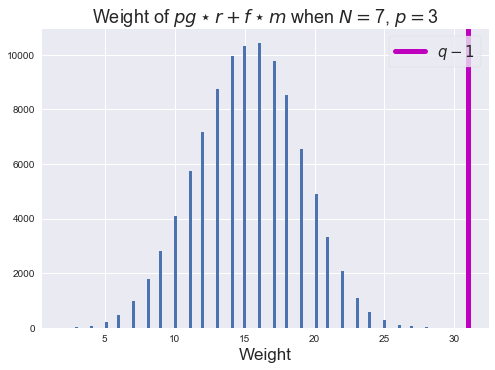

In [64]:
def max_difference(L):
    """ Returns the maximum difference between entries of L"""
    max_dif = 0
    for i in range(len(L) - 1):
        for j in range(i, len(L)):
            if np.abs(L[i] - L[j]) > max_dif:
                max_dif = np.abs(L[i] - L[j])
    return max_dif

# testing
validated = True
if max_difference([1,2,3,4]) != 3:
    validated = False
if max_difference([0,1,0,1,5,-5]) != 10:
    validated = False
if not validated:
    make_square('red')

def weight_histogram(N, p, trials=1000, filename=None, q=None):
    """ Returns a histogram of the weight of the coefficients 
        in p g*r + f*m for random (g,r,f,m), where weight is the max difference
        between any two coefficients. If q is specified, we put a vert line there"""
    maxes = []
    d = N//3
    
    for _ in range(trials):
        f = random_T(d+1, d, N)
        g = random_T(d, d, N)
        r = random_T(d, d, N)
        m = make_m(N, p)
        
        a = poly_add(scalar_mult(poly_convolution(g, r, N), p), poly_convolution(f, m, N))
        maxes.append(max_difference(a))
    
    plt.hist(maxes, bins='auto', rwidth=100)
    plt.title("Weight of " + r"$pg\star r + f\star m$" + " when " + r"$N=$" + str(N) + r', $p=$' + str(p), size=18)
    plt.xlabel("Weight", size=17)
    if q:
        plt.axvline(q-1, lw=5, color='m', label=r'$q-1$')
    plt.legend(loc=1, frameon=True, fontsize=15)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    return

weight_histogram(7,3, trials=100000, q=32)